Prepare a model for glass classification using KNN

In [56]:
import pandas as pd
import numpy as np
from seaborn import heatmap
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [57]:
Glass_Data = pd.read_csv('C:\\Users\\lenovo\\Downloads\\glass.csv')
Glass_Data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [58]:
Glass_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Type', ylabel='count'>

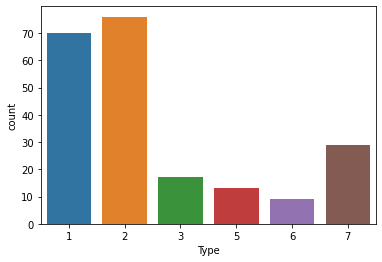

In [60]:
sns.countplot(data=Glass_Data,x='Type')

# train test slipt

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x =Glass_Data.iloc[:,1:17]
y=Glass_Data['Type']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=42)

In [64]:
x_train

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
137,12.89,3.62,1.57,72.96,0.61,8.11,0.00,0.00,2
65,13.69,3.59,1.12,71.96,0.09,9.40,0.00,0.00,1
108,14.43,0.00,1.00,72.67,0.10,11.52,0.00,0.08,2
181,14.99,0.78,1.74,72.50,0.00,9.95,0.00,0.00,6
31,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...
106,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
14,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00,1
92,13.12,3.41,1.58,73.26,0.07,8.39,0.00,0.19,2
179,14.09,2.19,1.66,72.67,0.00,9.32,0.00,0.00,6


In [65]:
y_train

137    2
65     1
108    2
181    6
31     1
      ..
106    2
14     1
92     2
179    6
102    2
Name: Type, Length: 149, dtype: int64

# Using KNN 

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
Knn = KNeighborsClassifier(n_neighbors=1)

In [68]:
Knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [69]:
pred = Knn.predict(x_test)

# predictions

In [70]:
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
print(confusion_matrix(y_test,pred))

[[19  0  0  0  0  0]
 [ 0 23  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  1  9]]


In [72]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       0.75      1.00      0.86         3
           7       1.00      0.90      0.95        10

    accuracy                           0.98        65
   macro avg       0.96      0.98      0.97        65
weighted avg       0.99      0.98      0.99        65



# Choosing a k value

In [73]:
error_rate = []

for i in range(1,21):
    
    Knn = KNeighborsClassifier(n_neighbors=i)
    Knn.fit(x_train,y_train)
    pred_i = Knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rete')

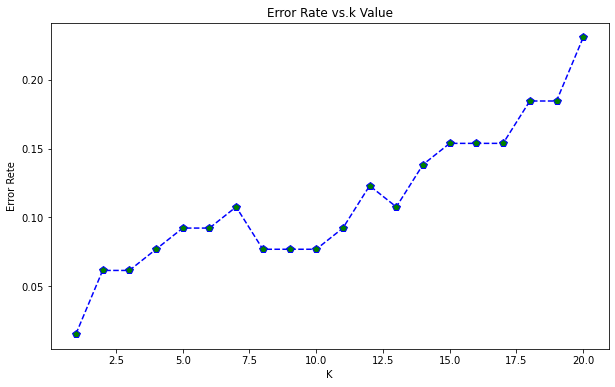

In [74]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),error_rate,color='blue',linestyle='dashed',marker='p',
        markerfacecolor='green',markersize=8)
plt.title('Error Rate vs.k Value')
plt.xlabel('K')
plt.ylabel('Error Rete')

In [75]:
Knn = KNeighborsClassifier(n_neighbors=3)

Knn.fit(x_train,y_train)
pred = Knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[19  0  0  0  0  0]
 [ 2 21  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  0  2  1]
 [ 0  0  0  0  1  9]]


              precision    recall  f1-score   support

           1       0.90      1.00      0.95        19
           2       1.00      0.91      0.95        23
           3       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       0.67      0.67      0.67         3
           7       0.90      0.90      0.90        10

    accuracy                           0.94        65
   macro avg       0.91      0.91      0.91        65
weighted avg       0.94      0.94      0.94        65

